Import modules

In [1]:
import os
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense, Activation, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
warnings.simplefilter("ignore", category=DeprecationWarning)

# DATA PREPARATION

Create Dataframe for train labels.

In [3]:
train_labels = '/Users/asifbala/Desktop/humpback-whale-identification.zip Folder/train.csv'
train_df = pd.read_csv(train_labels)
print(train_df.shape)
print(train_df.shape)
print(train_df.head())
print(train_df.describe())
print(train_df.info())
print(train_df['Id'].value_counts().head(20))
ringer = train_df['Id'].value_counts() == 1
print(ringer.value_counts())

(25361, 2)
(25361, 2)
           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
                Image         Id
count           25361      25361
unique          25361       5005
top     d07cec605.jpg  new_whale
freq                1       9664
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
Image    25361 non-null object
Id       25361 non-null object
dtypes: object(2)
memory usage: 396.3+ KB
None
new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
w_700ebb4      57
w_3de579a      54
w_564a34b      51
w_fd3e556      50
w_88e4537      49
w_2b069ba      48
w_d405854      47
w_f0fe284      45
w_789c969      45
w_343f088      40
w_5e8e218      40
w_778e474      40
w_60ce6fc      37
w_a9304b9      37
w_5a2634c      37
Name: Id, dtype: int64
False    2932
True     2073
Name: Id, dtype: 

There are 25361 samples/images belonging 5005 classes/Ids.'New whale' class has the most samples belonging to the class at 9664, far outnumbering the all the other classes.

Take 6300 samples, unable to train on full dataset due to computational restrictions.

In [4]:
train_df = train_df[:6300]

In [5]:
print(train_df.shape)
print(train_df.shape)
print(train_df.head())
print(train_df.describe())
print(train_df.info())
print(train_df['Id'].value_counts().head(20))
ringer = train_df['Id'].value_counts() == 1
print(ringer.value_counts())

(6300, 2)
(6300, 2)
           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
                Image         Id
count            6300       6300
unique           6300       2282
top     10dd1a607.jpg  new_whale
freq                1       2448
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 2 columns):
Image    6300 non-null object
Id       6300 non-null object
dtypes: object(2)
memory usage: 98.5+ KB
None
new_whale    2448
w_23a388d      19
w_9c506f6      16
w_9b5109b      14
w_0369a5c      13
w_88e4537      13
w_778e474      13
w_700ebb4      12
w_a9304b9      11
w_2b069ba      10
w_488865e      10
w_fd3e556      10
w_d405854      10
w_1ca9ab1      10
w_b9e5911      10
w_5a2634c      10
w_4bf625b      10
w_3de579a      10
w_581ba42       9
w_0a155b9       9
Name: Id, dtype: int64
True     1544
False     738
Name: Id, dtype: int64


With the 6300 samples being used, they belong to 2282 classes/Ids.'New whale' class has the most samples belonging to the class at 2448, far outnumbering the all the other classes.

# IMAGE AUGMENTATION

Method for Preparing Images to be input into convolutional neural network.

In [6]:
def image_prep(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 224, 224, 3))
    count = 0    
    for fig in data['Image']:
        img = image.load_img("/Users/asifbala/Desktop/humpback-whale-identification.zip Folder/"+dataset+"/"+fig, target_size=(224, 224, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        X_train[count] = x
        if (count%5000 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1    
    return X_train

Method for Preparing Images to be input into convolutional neural network.

In [7]:
def label_prep(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    y = onehot_encoded
    return y

Prepare images to be input into convolutional neural network.

In [8]:
X = image_prep(train_df, train_df.shape[0], "train")

X /= 255

print(X.shape)

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  5001 ,  3347515d9.jpg
(6300, 224, 224, 3)


Prepare labels to be input into convolutional neural network.

In [10]:
y = label_prep(train_df['Id'])

y_labels = np.argmax(y,axis=1)

print(y_labels.shape)

/Users/asifbala/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(6300,)


Method to plot whale images along with the label classification number.

In [14]:
def plot_images(images, cls_true):
    assert len(images) == len(cls_true)     
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        xlabel = "{}".format(cls_true[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

Sample of whale images along with the label classification number.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


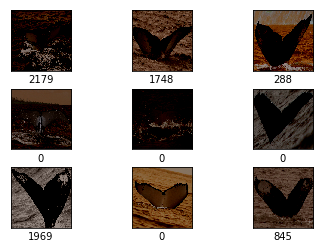

In [12]:
plot_images(X[:9],y_labels[:9])

# MODEL

Final Convolutional Neural Network Summary.

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides = (1, 1), padding='same', name = 'conv0',input_shape = (224, 224, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), strides = (1,1),padding='same', name="conv1"))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))

model.add(Conv2D(32, (3, 3), strides = (1,1),padding='same', name="conv2"))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), strides = (1,1),padding='same', name="conv3"))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool2'))

model.add(Conv2D(32, (3, 3), strides = (1,1),padding='same', name="conv4"))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), strides = (1,1),padding='same', name="conv5"))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool3'))

model.add(Conv2D(32, (3, 3), strides = (1,1),padding='same', name="conv6"))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), strides = (1,1),padding='same', name="conv7"))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool4'))

model.add(Conv2D(64, (3, 3), strides = (1,1),padding='same', name="conv8"))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), strides = (1,1),padding='same', name="conv9"))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool5'))

model.add(Conv2D(64, (3, 3), strides = (1,1),padding='same', name="conv10"))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), strides = (1,1),padding='same', name="conv11"))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool6'))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv2 (Conv2D)       

Results with limited sample size due to computational restrictions. Model overfit immediately (val loss increasing) due to lack of samples that computer could work with. However, achieved low initial validation loss after experimenting with many models, including transfer learning.

In [ ]:
history = model.fit(X,y,validation_split=0.2, epochs=7, batch_size=256, verbose=1)

Could not run neural network on Jupyter notebook. Copied from Spyder IDE.


_________________________________________________________________
Train on 5040 samples, validate on 1260 samples


Epoch 1
5040/5040 [==============================] - 896s 178ms/step - loss: 6.1124 - acc: 0.3732 - val_loss: 5.4830 - val_acc: 0.3889

Epoch 2
5040/5040 [==============================] - 906s 180ms/step - loss: 5.5190 - acc: 0.3885 - val_loss: 5.5284 - val_acc: 0.3889

Epoch 3
5040/5040 [==============================] - 867s 172ms/step - loss: 5.4625 - acc: 0.3885 - val_loss: 5.5577 - val_acc: 0.3889

Epoch 4
5040/5040 [==============================] - 942s 187ms/step - loss: 5.4398 - acc: 0.3885 - val_loss: 5.6139 - val_acc: 0.3889

Epoch 5
5040/5040 [==============================] - 945s 188ms/step - loss: 5.3850 - acc: 0.3885 - val_loss: 5.6355 - val_acc: 0.3889

Epoch 6
5040/5040 [==============================] - 894s 177ms/step - loss: 5.3885 - acc: 0.3885 - val_loss: 5.6897 - val_acc: 0.3889

Epoch 7
5040/5040 [==============================] - 875s 174ms/step - loss: 5.3400 - acc: 0.3885 - val_loss: 5.6925 - val_acc: 0.3889

Graph indicating the change in loss per batch for one Epoch:

In [ ]:
print(histories.losses)

x = range(len(histories.losses))

y = histories.losses

df = pd.DataFrame({'batch_number':x,'loss':y})

df = df.set_index('batch_number')

df.plot()

plt.ylabel('loss')

plt.show()

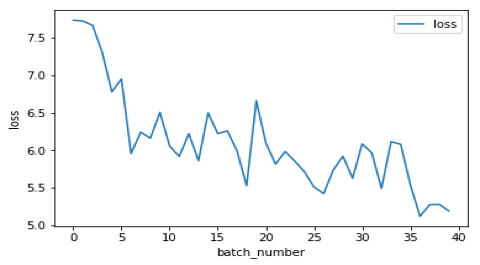

As we can see here, batch numbers 14, 19, and 33 proved to be the most difficult for the model to learn. Each one of those batches saw a large spike in the loss function.